<a href="https://colab.research.google.com/github/Matrixmax/Dive_into_DeepLearning/blob/main/0x33_%E5%BE%AA%E7%8E%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

上一节介绍的n元语法中，时间步t的词wt
​	
 基于前面所有词的条件概率只考虑了最近时间步的n−1个词。如果要考虑比t−(n−1)更早时间步的词对wt的可能影响，我们需要增大n。但这样模型参数的数量将随之呈指数级增长。

本节将介绍循环神经网络。它并非刚性地记忆所有固定长度的序列，而是通过隐藏状态来存储之前时间步的信息。首先我们回忆一下前面介绍过的多层感知机，然后描述如何添加隐藏状态来将它变成循环神经网络。

## 1.不含隐藏状态的神经网络



让我们考虑一个含单隐藏层的多层感知机。给定样本数为n、输入个数（特征数或特征向量维度）为d的小批量数据样本X。设隐藏层的激活函数为ϕ，那么隐藏层的输出H计算为
$\boldsymbol{H}=\phi\left(\boldsymbol{X} \boldsymbol{W}_{x h}+\boldsymbol{b}_{h}\right)$,其中隐藏层权重参数W，偏差参数b，h为隐藏单元个数。上式相加的两项形状不同，因此将按照广播机制相加。把隐藏变量HH作为输出层的输入，且设输出个数为qq（如分类问题中的类别数），输出层的输出为$\boldsymbol{O}=\boldsymbol{H} \boldsymbol{W}_{h q}+\boldsymbol{b}_{q}$,其中输出变量O，输出权重W，输出偏差b,如果是分类问题，我们可以使用softmax来计算输出类别的概率分布


## 2. 含有隐藏状态的循环神经网络
现在我们考虑输入数据存在时间相关性的情况。具体来说，时间步t的隐藏变量的计算由当前时间步的输入和上一时间步的隐藏变量共同决定：
$\boldsymbol{H}_{t}=\phi\left(\boldsymbol{X}_{t} \boldsymbol{W}_{x h}+\boldsymbol{H}_{t-1} \boldsymbol{W}_{h h}+\boldsymbol{b}_{h}\right)$

与多层感知机相比，我们在这里添加了$\boldsymbol{H}_{t-1} \boldsymbol{W}_{h h}$一项。由上式中相邻时间步的隐藏变量Ht和Ht−1之间的关系可知，这里的隐藏变量能够捕捉截至当前时间步的序列的历史信息，就像是神经网络当前时间步的状态或记忆一样。因此，该隐藏变量也称为隐藏状态。由于隐藏状态在当前时间步的定义使用了上一时间步的隐藏状态，上式的计算是循环的。使用循环计算的网络即循环神经网络（recurrent neural network）。

循环神经网络有很多种不同的构造方法。含上式所定义的隐藏状态的循环神经网络是极为常见的一种。若无特别说明，本章中的循环神经网络均基于上式中隐藏状态的循环计算。在时间步tt，输出层的输出和多层感知机中的计算类似：
$\boldsymbol{O}_{t}=\boldsymbol{H}_{t} \boldsymbol{W}_{h q}+\boldsymbol{b}_{q}$

图6.1展示了循环神经网络在3个相邻时间步的计算逻辑。在时间步tt，隐藏状态的计算可以看成是将输入Xt和前一时间步隐藏状态Ht−1连结后输入一个激活函数为ϕ的全连接层。该全连接层的输出就是当前时间步的隐藏状态Ht，且模型参数为Wxh与Whh的连结，偏差为bh。当前时间步tt的隐藏状态Ht将参与下一个时间步t+1的隐藏状态Ht+1的计算，并输入到当前时间步的全连接输出层。

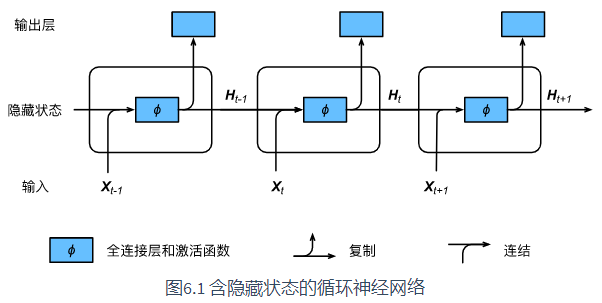


In [3]:
import torch
X,W_xh = torch.randn(3,1),torch.randn(1,4)
H, W_hh = torch.randn(3, 4), torch.randn(4, 4)
torch.matmul(X,W_xh) + torch.matmul(H,W_hh)

tensor([[-1.7236, -1.4148, -3.7939,  0.8659],
        [ 3.3342,  0.6744, -2.4958, -1.0915],
        [ 1.8384,  1.1047,  2.6336, -1.4463]])

## 3. 应用：基于字符级循环神经网络的语言模型
最后我们介绍如何应用循环神经网络来构建一个语言模型。设小批量中样本数为1，文本序列为“想”“要”“有”“直”“升”“机”。图6.2演示了如何使用循环神经网络基于当前和过去的字符来预测下一个字符。在训练时，我们对每个时间步的输出层输出使用softmax运算，然后使用交叉熵损失函数来计算它与标签的误差。在图6.2中，由于隐藏层中隐藏状态的循环计算，时间步3的输出O3取决于文本序列“想”“要”“有”。 由于训练数据中该序列的下一个词为“直”，时间步3的损失将取决于该时间步基于序列“想”“要”“有”生成下一个词的概率分布与该时间步的标签“直”。

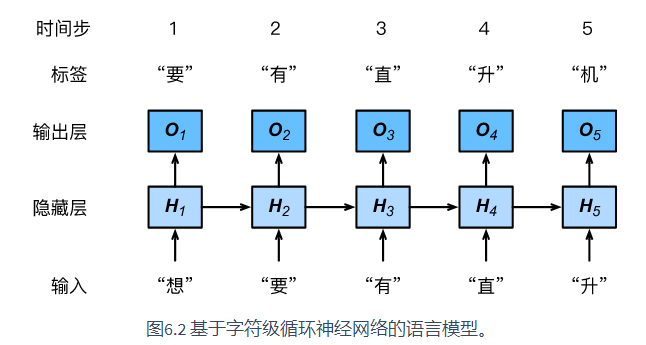


因为每个输入词是一个字符，因此这个模型被称为字符级循环神经网络（character-level recurrent neural network）。因为不同字符的个数远小于不同词的个数（对于英文尤其如此），所以字符级循环神经网络的计算通常更加简单。在接下来的几节里，我们将介绍它的具体实现。